In [1]:
import pandas as pd
from sklearn import preprocessing
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:

df = pd.read_csv("CustomerData.csv")
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,Female,NaN,40.9,27,62,Iran,Baby,offline
1,2,Sinclair,Male,53.0,NaN,42,47,China,NaN,online
2,3,Enoch,Male,22.0,NaN,70,26,China,Computers,offline
3,4,Lorenzo,Male,9.0,18.5,68,80,Russia,NaN,online
4,5,Damian,Male,55.0,18.4,69,89,Philippines,Jewelery,offline


In [3]:

# Data Processing
print(df.isnull().sum())
df.gender.fillna(df.gender.mode()[0], inplace=True)
df.category.fillna(df.category.mode()[0], inplace=True)
df.age.fillna(int(df.age.mean()), inplace=True)
df["annual income (lakhs)"].fillna(df["annual income (lakhs)"].mean(),
                                   inplace=True)
print(df.isnull().sum())

customer_id                   0
name                          0
gender                       10
age                           5
annual income (lakhs)         8
spending score                0
items purchased (monthly)     0
country                       0
category                     13
purchase type                 0
dtype: int64
customer_id                  0
name                         0
gender                       0
age                          0
annual income (lakhs)        0
spending score               0
items purchased (monthly)    0
country                      0
category                     0
purchase type                0
dtype: int64


In [4]:
encoder = preprocessing.LabelEncoder()
df[["category","purchase type ","gender"]] = df[["category","purchase type ","gender"]].apply(encoder.fit_transform)

In [6]:
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,29.0,40.900000,27,62,Iran,1,0
1,2,Sinclair,1,53.0,35.578846,42,47,China,2,1
2,3,Enoch,1,22.0,35.578846,70,26,China,5,0
3,4,Lorenzo,1,9.0,18.500000,68,80,Russia,2,1
4,5,Damian,1,55.0,18.400000,69,89,Philippines,12,0


In [7]:
scaler = preprocessing.MinMaxScaler()
df[["spending score", "items purchased (monthly)",
    "annual income (lakhs)"]] = scaler.fit_transform(df[["spending score", "items purchased (monthly)",
    "annual income (lakhs)"]])

In [9]:
df.head()

,customer_id,name,gender,age,annual income (lakhs),spending score,items purchased (monthly),country,category,purchase type
0,1,Edith,0,29.0,0.608607,0.255102,0.616162,Iran,1,0
1,2,Sinclair,1,53.0,0.499567,0.408163,0.464646,China,2,1
2,3,Enoch,1,22.0,0.499567,0.693878,0.252525,China,5,0
3,4,Lorenzo,1,9.0,0.149590,0.673469,0.797980,Russia,2,1
4,5,Damian,1,55.0,0.147541,0.683673,0.888889,Philippines,12,0


In [11]:
features = df[['age', 'gender', 'annual income (lakhs)']]
target = df['purchase type ']
x_train, x_test, y_train, y_test = train_test_split(features,
                                                    target,
                                                    random_state=0,
                                                    test_size=0.3)

In [13]:
from sklearn.ensemble import BaggingClassifier
bagging  = BaggingClassifier(random_state = 0)
bagging.fit(x_train,y_train)
predicted = bagging.predict(x_test)
probability = bagging.predict_proba(x_test)[:,1]
bagging.score(x_test,y_test)

0.5555555555555556

In [14]:
from sklearn import metrics
print(metrics.confusion_matrix(y_test,predicted))
print(metrics.classification_report(y_test,predicted))

[[5 4]
 [4 5]]
              precision    recall  f1-score   support

           0       0.56      0.56      0.56         9
           1       0.56      0.56      0.56         9

    accuracy                           0.56        18
   macro avg       0.56      0.56      0.56        18
weighted avg       0.56      0.56      0.56        18




Area under the curve:  0.5555555555555556


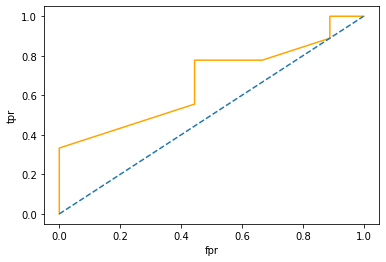

In [15]:
print("\nArea under the curve: ", metrics.roc_auc_score(y_test, predicted))
fpr, tpr, thresholds = metrics.roc_curve(y_test, probability)
plt.plot(fpr, tpr, color='orange')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.show()